# EDA

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import logging
import random

In [2]:
%matplotlib inline
#%matplotlib widget

In [34]:
logging.getLogger().setLevel(logging.INFO)

## Reading data

In [2]:
data_path = '../dataset/train.csv'
dataset = pd.read_csv(data_path)
display(dataset.shape)

(42000, 785)

## Visualizing data

In [5]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data distribution

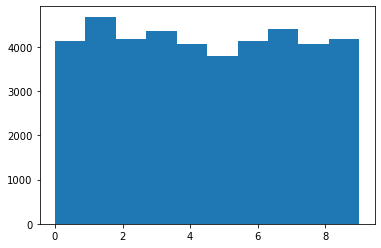

In [6]:
plt.hist(dataset.label)
plt.show()

We can see here that the data is porperly distributed among all the classes and every class is similar number of examples to train on

### Data examples

In [7]:
exmple_data = dataset.iloc[0]

In [8]:
logging.info(type(exmple_data[1:]))
example_img = exmple_data[1:].values.reshape((28, 28))

INFO:root:<class 'pandas.core.series.Series'>


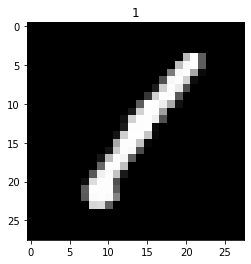

In [9]:
plt.imshow(example_img, cmap='gray')
plt.title(exmple_data.label)
plt.show()

We can see here that the series values when converted into a shape of 28x28 gives us the perfect output

### Sampling multiple data

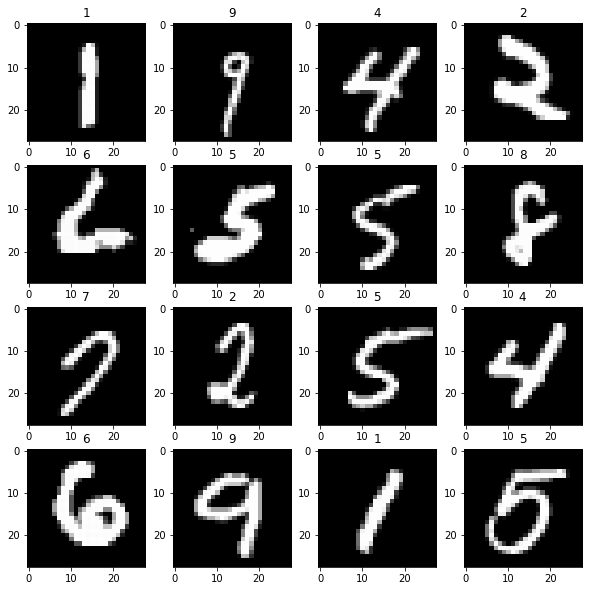

In [10]:
plt.figure(figsize=(10,10))
for i in range(16):
    index = random.randint(0, dataset.shape[0])
    img = dataset.iloc[index][1:].values.reshape((28,28))
    subplt = plt.subplot(4, 4, i+1)
    subplt.imshow(img, cmap='gray')
    subplt.set_title(dataset.iloc[index].label)
plt.show()

## Get Data for processing

In [3]:
def train_test_validation_split(dataframe: pd.DataFrame, train_ratio = 0.8, validation_ratio = 0.1):
    """
    Will have to find equal weighted training data
    rest can be easily distributed in validation and test set
    Given that the data has almost equal examples for each label
    """
    assert train_ratio + validation_ratio < 1.0
    data = dataframe.copy()
    # basic info gathering to aid partitioning
    labels = data.label.unique()
    min_item_per_label = data.groupby('label').label.count().min()
    # defining the indexes
    train_index = int(min_item_per_label * train_ratio)
    validation_index = int(min_item_per_label * validation_ratio + train_index)
    # randomize the data
    data.sample(frac=1).reset_index(drop=True)
    # sample data
    train_data = pd.DataFrame()
    validation_data = pd.DataFrame()
    test_data = pd.DataFrame()
    for l in labels:
        logging.info('handling label: '+ str(l))
        train_data = train_data.append(data[data.label == l].iloc[:train_index])
        validation_data = validation_data.append(data[data.label == l].iloc[train_index: validation_index])
        test_data = test_data.append(data[data.label == l].iloc[validation_index:])
    # shuffling the data
    train_data.sample(frac=1).reset_index(drop=True)
    test_data.sample(frac=1).reset_index(drop=True)
    validation_data.sample(frac=1).reset_index(drop=True)
    # validating that all the set contains all the labels
    assert len(train_data.label.unique()) == len(labels)
    assert len(test_data.label.unique()) == len(labels)
    assert len(validation_data.label.unique()) == len(labels)
    
    return train_data, validation_data, test_data

In [22]:
train_data, validation_data, test_data = train_test_validation_split(dataset)

In [7]:
train_data.groupby('label').label.count()

label
0    3036
1    3036
2    3036
3    3036
4    3036
5    3036
6    3036
7    3036
8    3036
9    3036
Name: label, dtype: int64

In [111]:
validation_data.groupby('label').label.count()

label
0    379
1    379
2    379
3    379
4    379
5    379
6    379
7    379
8    379
9    379
Name: label, dtype: int64

In [112]:
test_data.groupby('label').label.count()

label
0     717
1    1269
2     762
3     936
4     657
5     380
6     722
7     986
8     648
9     773
Name: label, dtype: int64

In [115]:
def plot_sample_data(dataset: pd.DataFrame):
    for i in range(16):
        index = random.randint(0, dataset.shape[0])
        subplot = plt.subplot(4, 4, i+1)
        data = dataset.iloc[index]
        subplot.set_title(data.label)
        subplot.imshow(data[1:].values.reshape((28,28)), cmap='gray')
    plt.show()

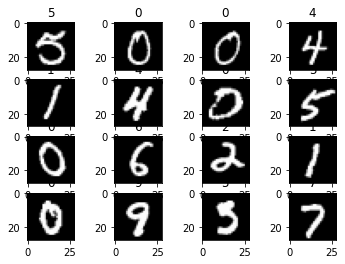

In [116]:
plot_sample_data(train_data)

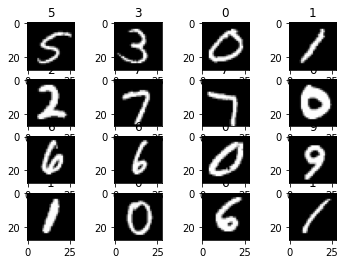

In [117]:
plot_sample_data(test_data)

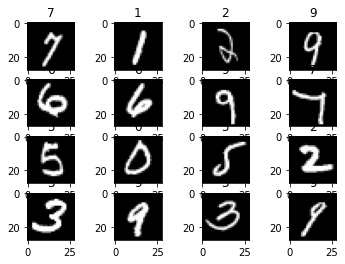

In [118]:
plot_sample_data(validation_data)

In [8]:
def get_data(train_ratio=0.8, validation_ratio=0.1) -> (pd.DataFrame, pd.DataFrame, pd.DataFrame):
    data = pd.read_csv(data_path)
    return train_test_validation_split(data, train_ratio, validation_ratio)

## Convert data for model consumption

In [31]:
def get_label_and_features_from_dataframe(df: pd.DataFrame) -> (np.ndarray, np.ndarray):
    y = df.label.values
    x = train_data[train_data.columns[1:]].values.reshape((-1, 28, 28, 1))
    return x, y

In [32]:
train_x, train_y = get_label_and_features_from_dataframe(train_data)

In [35]:
logging.info(train_x.shape)
logging.info(train_y.shape)

INFO:root:(30360, 28, 28, 1)
INFO:root:(30360,)
